In [32]:
! pip install kaggle

In [33]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [34]:
! cp kaggle.json ~/.kaggle/

In [35]:
! chmod 600 ~/.kaggle/kaggle.json

In [36]:
! kaggle datasets download berkeleyearth/climate-change-earth-surface-temperature-data

climate-change-earth-surface-temperature-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip climate-change-earth-surface-temperature-data.zip

Archive:  climate-change-earth-surface-temperature-data.zip
replace GlobalLandTemperaturesByCity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("GlobalLandTemperaturesByCity.csv")

In [3]:
# df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [4]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [5]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

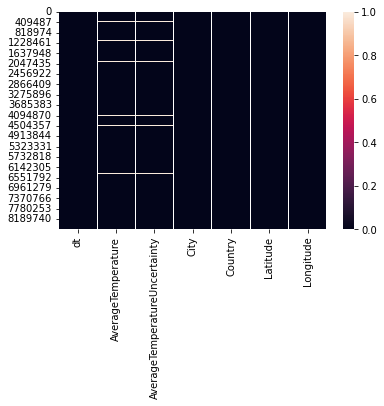

In [7]:
sns.heatmap(df.isnull())

In [8]:
# sum(df['AverageTemperature'].isnull())/len(df['AverageTemperature'])

In [9]:
def percent(dataset):
  percentages = dict()
  for col in dataset.columns:
    column = dataset[col]
    percentages[col] = (sum(column.isnull())/len(column))*100
  return percentages


In [10]:
missing = percent(df)

In [11]:
drop_columns = [x for x,y in list(filter(lambda x : x[1] > 15,[(x,missing[x]) for x in missing.keys()]))]

In [12]:
fill_columns = [x for x,y in list(filter(lambda x : 0 < x[1] <= 15,[(x,missing[x]) for x in missing.keys()]))]

In [13]:
full_columns = [x for x,y in list(filter(lambda x : x[1] == 0,[(x,missing[x]) for x in missing.keys()]))]

In [14]:
drop_columns

[]

In [15]:
fill_columns

['AverageTemperature', 'AverageTemperatureUncertainty']

In [16]:
full_columns

['dt', 'City', 'Country', 'Latitude', 'Longitude']

In [17]:
new_df = df[full_columns]

In [18]:
missing

{'AverageTemperature': 4.234457761943769,
 'AverageTemperatureUncertainty': 4.234457761943769,
 'City': 0.0,
 'Country': 0.0,
 'Latitude': 0.0,
 'Longitude': 0.0,
 'dt': 0.0}

In [19]:
new_df

,dt,City,Country,Latitude,Longitude
0,1743-11-01,Århus,Denmark,57.05N,10.33E
1,1743-12-01,Århus,Denmark,57.05N,10.33E
2,1744-01-01,Århus,Denmark,57.05N,10.33E
3,1744-02-01,Århus,Denmark,57.05N,10.33E
4,1744-03-01,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...
8599207,2013-05-01,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,Zwolle,Netherlands,52.24N,5.26E


In [20]:
compile = pd.concat([new_df,df[fill_columns[0]]],axis = 1)

In [21]:
compile

,dt,City,Country,Latitude,Longitude,AverageTemperature
0,1743-11-01,Århus,Denmark,57.05N,10.33E,6.068
1,1743-12-01,Århus,Denmark,57.05N,10.33E,NaN
2,1744-01-01,Århus,Denmark,57.05N,10.33E,NaN
3,1744-02-01,Århus,Denmark,57.05N,10.33E,NaN
4,1744-03-01,Århus,Denmark,57.05N,10.33E,NaN
...,...,...,...,...,...,...
8599207,2013-05-01,Zwolle,Netherlands,52.24N,5.26E,11.464
8599208,2013-06-01,Zwolle,Netherlands,52.24N,5.26E,15.043
8599209,2013-07-01,Zwolle,Netherlands,52.24N,5.26E,18.775
8599210,2013-08-01,Zwolle,Netherlands,52.24N,5.26E,18.025


In [22]:
compile.dtypes

dt                     object
City                   object
Country                object
Latitude               object
Longitude              object
AverageTemperature    float64
dtype: object

In [27]:
df.drop(drop_columns, axis=1, inplace=True)

In [36]:
def handle_nan(df,full_col,fill_col):
  df_fullcolmns = df[full_col]
  for to_fill in fill_col:
    dataf = pd.concat([df_fullcolmns,df[to_fill]],axis=1)
    ref_df = dataf.dropna(axis=0)
    

In [37]:
handle_nan(df,full_columns,fill_columns)

                 dt    City      Country Latitude Longitude  \
0        1743-11-01   Århus      Denmark   57.05N    10.33E   
5        1744-04-01   Århus      Denmark   57.05N    10.33E   
6        1744-05-01   Århus      Denmark   57.05N    10.33E   
7        1744-06-01   Århus      Denmark   57.05N    10.33E   
8        1744-07-01   Århus      Denmark   57.05N    10.33E   
...             ...     ...          ...      ...       ...   
8599206  2013-04-01  Zwolle  Netherlands   52.24N     5.26E   
8599207  2013-05-01  Zwolle  Netherlands   52.24N     5.26E   
8599208  2013-06-01  Zwolle  Netherlands   52.24N     5.26E   
8599209  2013-07-01  Zwolle  Netherlands   52.24N     5.26E   
8599210  2013-08-01  Zwolle  Netherlands   52.24N     5.26E   

         AverageTemperature  
0                     6.068  
5                     5.788  
6                    10.644  
7                    14.051  
8                    16.082  
...                     ...  
8599206               7.710  
859